TITANIC DATASET FROM KAGGALE

TASK 01: BASIC DATA EXPLORATION

i_ Load the Dataset and Display the first 5 rows

In [2]:
import kagglehub
import pandas as pd

dataSet = pd.read_csv("The Titanic Dataset.csv")

dataSet.head()

c:\Users\Muhammad Faizan Ali\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


ii_ Check the no. of rows and no. of columns in the dataSet.

In [3]:
rows, columns = dataSet.shape
print(f"There are {rows} Rows and {columns} Columns")


There are 1309 Rows and 14 Columns


iii_ Get the datatypes of each column

In [4]:
dataSet.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

iiii_ Check missing values in each column and count them.

In [5]:
dataSet.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

TASK 02: DATA CLEANING

i_ Fill the missing values in the age column with the median age.

In [6]:
dataSet['age'] = dataSet['age'].fillna(dataSet['age'].median())
dataSet['age'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: age, Length: 1309, dtype: bool

ii_ Drop the "cabin" column (Since it has many missing values).

In [7]:
dataSet.drop('cabin', axis=1, inplace=True)
dataSet

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,28.00,1,0,2665,14.4542,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,C,NaN,NaN,NaN


iii_ Replace missing values in "embark_town" with most frequent value.

In [8]:
dataSet['embarked'] = dataSet['embarked'].fillna(dataSet['embarked'].mode()[0])
dataSet.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

TASK 03: DATA SELECTION AND FILTERATION

i_ Select all passengers who are males and above 30 years old.

In [9]:
male_passengers_age_above_30 = dataSet[(dataSet['age'] >= 30) & (dataSet['sex'] == 'male')]
male_passengers_age_above_30.sort_values(by='age')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
1218,3,0,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,S,NaN,NaN,NaN
209,1,1,"Mock, Mr. Philipp Edmund",male,30.0,1,0,13236,57.7500,C,11,NaN,"New York, NY"
912,3,0,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,S,NaN,NaN,NaN
875,3,0,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,C,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q,NaN,171.0,NaN
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C,NaN,22.0,"Montevideo, Uruguay"
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C,NaN,NaN,"New York, NY"
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S,NaN,NaN,NaN


ii_ Display only names, age and fare columns for passengers who survived.

In [10]:
dataSet[dataSet['survived'] == 1][['survived' ,'name', 'age', 'fare']]

,survived,name,age,fare
0,1,"Allen, Miss. Elisabeth Walton",29.00,211.3375
1,1,"Allison, Master. Hudson Trevor",0.92,151.5500
5,1,"Anderson, Mr. Harry",48.00,26.5500
6,1,"Andrews, Miss. Kornelia Theodosia",63.00,77.9583
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.00,51.4792
...,...,...,...,...
1261,1,"Turkula, Mrs. (Hedwig)",63.00,9.5875
1277,1,"Vartanian, Mr. David",22.00,7.2250
1286,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",38.00,7.2292
1290,1,"Wilkes, Mrs. James (Ellen Needs)",47.00,7.0000


iii_ Find all passengers who paid a fare greater than 100.

In [11]:
dataSet[dataSet['fare'] >= 100].sort_values(by='fare')
# print(f"There are {len(dataSet[dataSet['fare'] >= 100])} passengers who paid fare more than 100.")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
96,1,0,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C,NaN,62.0,"Deephaven, MN / Cedar Rapids, IA"
98,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.4250,C,2,NaN,"Deephaven, MN / Cedar Rapids, IA"
182,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,C,2,NaN,NaN
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,8,NaN,NaN
228,1,0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C,NaN,NaN,"Madrid, Spain"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,S,10,NaN,"Winnipeg, MB"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,3,NaN,NaN
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C,3,NaN,"Germantown, Philadelphia, PA"
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"


TASK 04: AGGREGATION AND GROUPING

i_ Find the average fare paid by each class.

In [12]:
dataSet.groupby('pclass')['fare'].mean().round(3)

pclass
1    87.509
2    21.179
3    13.303
Name: fare, dtype: float64

ii_ Count the number of passengers based on their embarkation town.

In [13]:
dataSet.groupby('embarked')['pclass'].count()

embarked
C    270
Q    123
S    916
Name: pclass, dtype: int64

iii_ Find the maximum age of passengers in each gender group.

In [14]:
dataSet.groupby('sex')['age'].max().astype('Int64')

sex
female    76
male      80
Name: age, dtype: Int64

TASK 05: SORTING AND RANKING.

i_ Sort the dataSet based on 'age' in descending order.

In [15]:
dataSet.sort_values(by='age', ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.00,1,0,19877,78.8500,S,6,NaN,"Little Onn Hall, Staffs"
1235,3,0,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,S,NaN,NaN,NaN
135,1,0,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,C,NaN,NaN,"New York, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,C,NaN,22.0,"Montevideo, Uruguay"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,3,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,C,NaN,"Syria New York, NY"
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S,4,NaN,"Detroit, MI"
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C,16,NaN,NaN
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,S,NaN,NaN,"Stanton, IA"


ii_ Sort based on "fare" first (desc) and then by "age" (asc)

In [16]:
dataSet.sort_values(by='fare', ascending=False).sort_values(by='age')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,S,10,NaN,"Devon, England Wichita, KS"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,S,NaN,NaN,"Stanton, IA"
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C,16,NaN,NaN
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S,4,NaN,"Detroit, MI"
1111,3,0,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,S,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,C,NaN,22.0,"Montevideo, Uruguay"
135,1,0,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,C,NaN,NaN,"New York, NY"
1235,3,0,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,S,NaN,NaN,NaN
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.00,1,0,19877,78.8500,S,6,NaN,"Little Onn Hall, Staffs"


TASK 06: DATA VISUALIZATION

i_ Plot a bar chart showing the number of survivors by gender.

<Axes: xlabel='sex', ylabel='survived'>

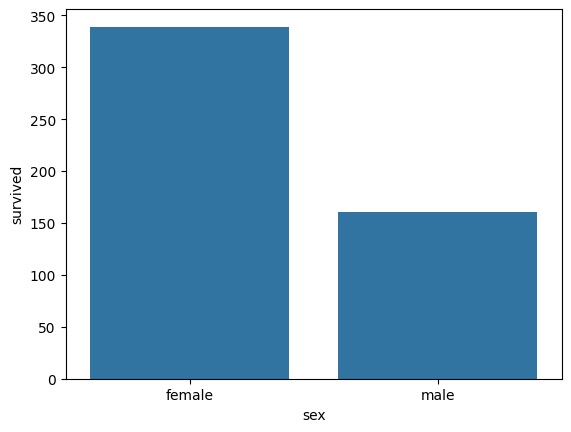

In [33]:
import seaborn as sns

no_of_survivors = dataSet[dataSet['survived'] == 1].groupby('sex')['survived'].count().reset_index()

sns.barplot(x='sex', y='survived', data=no_of_survivors)

ii_ Create a Histogram of the age distribution.

<Axes: xlabel='age', ylabel='Count'>

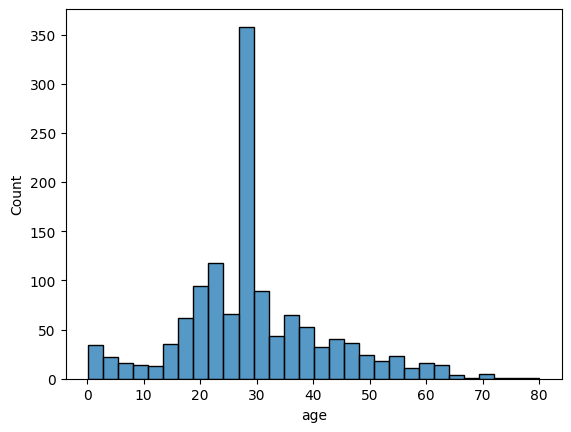

In [34]:
sns.histplot(dataSet['age'], bins=30)

iii_ Generate a box plot to see the distribution of fare by passenger class.

<Axes: xlabel='pclass', ylabel='fare'>

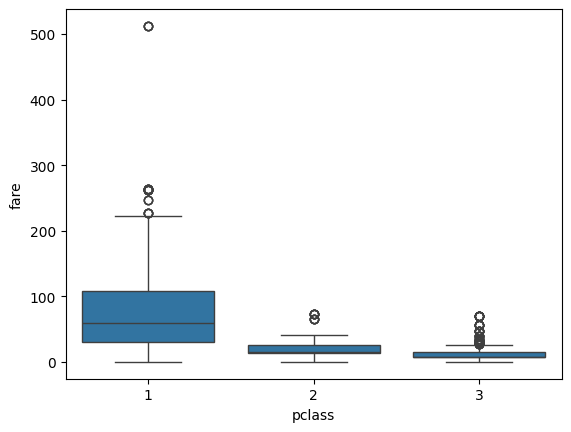

In [ ]:
sns.boxplot(x='pclass', y='fare', data= dataSet)
